In [2]:
!pip install nltk
!pip instal gensim

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt_tab')
data = []
sample_text="""the bank of the river was covered with lush green grass,
and people were enjoying the peaceful view  on the other side, 
the bank where the financial institution is located had a busy crowd of customers and workers despite the difference in activities, 
both places offered a sense of stability and support to those who visited them"""
sample_text= sample_text.replace("\n", " ")
for i in sent_tokenize(sample_text):
	temp = []
	# tokenize the sentence into words
	for j in word_tokenize(i):
		temp.append(j.lower())
	data.append(temp)
# creating our CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
								vector_size=2, window=5)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:


# Assuming `model` is your trained Word2Vec model
model1.save("word2vec_model.model")  # Save in Gensim's native format
model1.wv.save_word2vec_format("word2vec_model.bin", binary=True)  # Save in binary Word2Vec format
model1.wv.save_word2vec_format("word2vec_model.txt", binary=False)  # Save in plain text Word2Vec format


In [13]:
print("Cosine similarity between 'bank' " +"and 'financial' - CBOW : ",model1.wv.similarity('bank', 'financial'))

Cosine similarity between 'bank' and 'grass' - CBOW :  0.90064776


In [14]:
print("Cosine similarity between 'bank' " +"and 'river' - CBOW : ",model1.wv.similarity('bank', 'river'))

Cosine similarity between 'bank' and 'river' - CBOW :  -0.72492427


In [16]:
model1.wv.get_vector('bank')

array([ 0.36906847, -0.07661173], dtype=float32)

In [17]:
from transformers import BertTokenizer, BertModel
import torch
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
def get_word_embedding(sentence, target_word):
    # Tokenize input sentence
    inputs = tokenizer(sentence, return_tensors="pt") 
    # Forward pass through BERT
    with torch.no_grad():
        outputs = model(**inputs)
    # Extract hidden states (last layer) from BERT
    hidden_states = outputs.last_hidden_state
    # Find the position of the target word
    target_index = inputs.input_ids[0].tolist().index(tokenizer.encode(target_word, add_special_tokens=False)[0])
    # Extract the embedding for the target word (average of the token embeddings)
    target_embedding = hidden_states[0, target_index].numpy()
    return target_embedding
# Example sentences with the word "bank"
sentence1 = "I went to the bank of the river to relax."
sentence2 = "I deposited money into my bank account this morning."
# Get embeddings for both contexts of the word "bank"
embedding1 = get_word_embedding(sentence1, "bank")
embedding2 = get_word_embedding(sentence2, "bank")
print("Embedding for 'bank' in river context:")
print(embedding1)
print("\nEmbedding for 'bank' in financial context:")
print(embedding2)


C:\Users\ujwal\Twin_tower_model\twin_model\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Embedding for 'bank' in river context:
[-2.33406067e-01 -4.92273986e-01 -3.51480424e-01 -5.49867824e-02
 -4.62861836e-01 -7.38765299e-02 -4.78137955e-02  1.59845054e+00
  5.08617535e-02 -5.28456926e-01  1.12227750e+00  4.98486668e-01
  4.85102385e-01  1.54275879e-01 -1.09642434e+00  1.98596925e-01
 -1.10387050e-01 -1.98050916e-01  7.30857193e-01  4.60049897e-01
  1.62699342e-01  3.72431844e-01 -7.90162012e-02  7.05300331e-01
  1.52129367e-01  3.16909432e-01  8.48197579e-01 -3.82809848e-01
  3.58578563e-01  2.07555205e-01  1.28453505e+00  1.88013986e-01
 -4.77095582e-02  3.20771813e-01 -5.72809815e-01 -1.18513867e-01
 -3.12102214e-03 -5.78482985e-01 -3.03711653e-01  1.00537312e+00
 -8.31644833e-01 -1.24726546e+00 -4.94717270e-01  6.69835091e-01
  1.46005750e-02  2.89321661e-01  3.71036977e-02  1.44049719e-01
  1.34086102e-01  2.39730299e-01 -3.64740431e-01  9.86795962e-01
  4.79765758e-02 -7.11301208e-01  1.26156539e-01  2.32834220e-01
 -5.21492183e-01 -9.73514915e-01 -6.55071735e-01 -1

Cosine Similarity: 0.4569116234779358


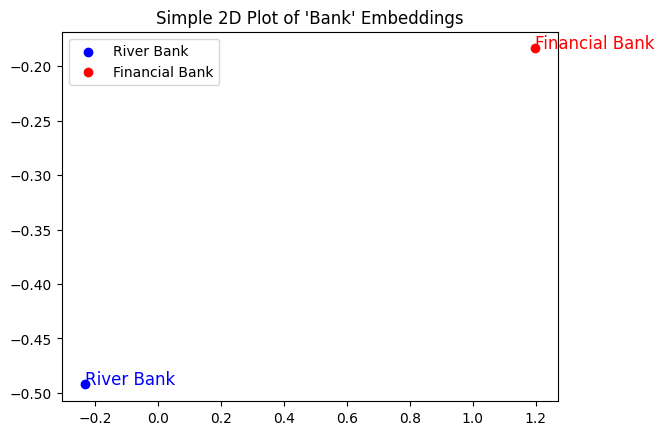

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity between the two embeddings
def compute_cosine_similarity(embedding1, embedding2):
    cosine_sim = cosine_similarity([embedding1], [embedding2])
    return cosine_sim[0][0]
# Compute cosine similarity
similarity = compute_cosine_similarity(embedding1, embedding2)
print(f"Cosine Similarity: {similarity}")
# Simple 2D plot of the embeddings (just plotting the first two values for simplicity)
def simple_visualization(embedding1, embedding2):
    # We can plot just the first two dimensions of each embedding
    plt.scatter(embedding1[0], embedding1[1], color='blue', label="River Bank")
    plt.scatter(embedding2[0], embedding2[1], color='red', label="Financial Bank")
    
    # Adding labels
    plt.text(embedding1[0], embedding1[1], "River Bank", fontsize=12, color='blue')
    plt.text(embedding2[0], embedding2[1], "Financial Bank", fontsize=12, color='red')
    
    # Display plot
    plt.title("Simple 2D Plot of 'Bank' Embeddings")
    plt.legend()
    plt.show()
# Visualize embeddings
simple_visualization(embedding1, embedding2)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from gensim.models import KeyedVectors
from nltk.corpus import wordnet as wn
from nltk.corpus import semcor
from collections import defaultdict
import nltk

In [2]:
nltk.download('wordnet')
nltk.download('semcor')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...
[nltk_data] Downloading package semcor to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...


True

In [6]:
# Load pre-trained word embeddings
embedding_path = 'word2vec_model.bin'
word_vectors = KeyedVectors.load_word2vec_format(embedding_path, binary=True)  # Use GloVe if needed


Senses for 'bank':
 - bank.n.01: sloping land (especially the slope beside a body of water)
 - bank.n.03: a long ridge or pile
 - bank.n.04: an arrangement of similar objects in a row or in tiers
 - bank.n.05: a supply or stock held in reserve for future use (especially in emergencies)
 - bank.n.06: the funds held by a gambling house or the dealer in some gambling games
 - bank.n.07: a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
 - bank.n.09: a building in which the business of banking transacted
 - bank.n.10: a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
 - bank.v.01: tip laterally
 - bank.v.02: enclose with a bank
 - bank.v.03: do business with a bank or keep an account at a bank
 - bank.v.04: act as the banker in a game or in gambling
 - bank.v.05: be in the banking business
 - bank.v.07: cover with ashes so to control the rate of burning
No valid embe

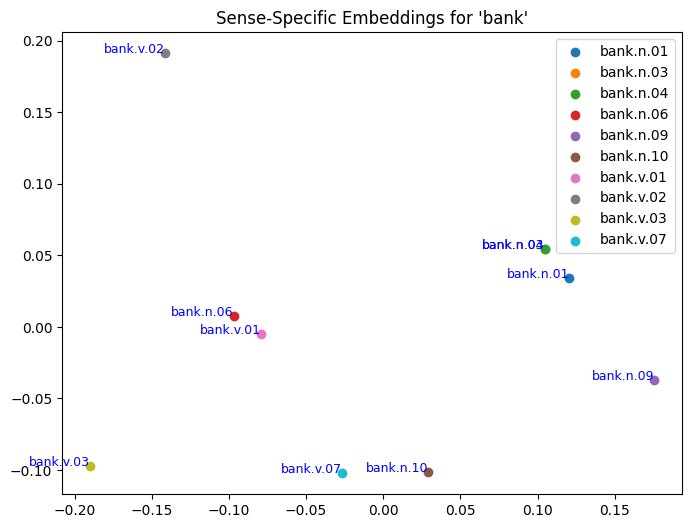

In [27]:
s_emb={}


def get_sense_definitions_and_examples(word):
    """
    Get WordNet sense definitions and examples for a given word.
    """
    senses = {}
    for synset in wn.synsets(word):
        # Filter synsets to include only those matching the POS type of interest (e.g., noun)
        if synset.name().startswith(word):
            senses[synset.name()] = {
                "definition": synset.definition(),
                "examples": synset.examples(),
            }
    return senses


def generate_sense_embeddings(word, senses, word_vectors):
    """
    Generate embeddings for each sense based on example sentences.
    """
    sense_embeddings = {}

    for sense, data in senses.items():
        examples = data["examples"]
        example_vectors = []

        for example in examples:
            # Tokenize the sentence and get embeddings for valid tokens
            tokens = example.split()
            valid_tokens = [t for t in tokens if t in word_vectors]
            if valid_tokens:
                vectors = np.array([word_vectors[t] for t in valid_tokens])
                example_vectors.append(np.mean(vectors, axis=0))  # Average the vectors

        if example_vectors:
            # Average embeddings across all examples for a sense
            sense_embeddings[sense] = np.mean(example_vectors, axis=0)
        else:
            print(f"No valid embeddings found for sense: {sense}")

    return sense_embeddings


def visualize_embeddings(word, sense_embeddings):
    """
    Visualize sense-specific embeddings using PCA.
    """
    if not sense_embeddings:
        print(f"No embeddings found for the word '{word}'")
        return

    vectors = list(sense_embeddings.values())
    labels = list(sense_embeddings.keys())

    # Apply PCA to reduce dimensions
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    # Plot the reduced vectors
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=label)
        plt.text(
            reduced_vectors[i, 0],
            reduced_vectors[i, 1],
            label,
            fontsize=9,
            ha="right",
            color="blue",
        )
    plt.title(f"Sense-Specific Embeddings for '{word}'")
    plt.legend()
    plt.show()


def main():
    # Word for which we differentiate senses
    word = "bank"

    # Load pre-trained embeddings
    

    # Step 1: Get senses from WordNet
    senses = get_sense_definitions_and_examples(word)
    print(f"Senses for '{word}':")
    for sense, details in senses.items():
        print(f" - {sense}: {details['definition']}")

    # Step 2: Generate sense embeddings
    sense_embeddings = generate_sense_embeddings(word, senses, word_vectors)
    print(sense_embeddings)
    # Step 3: Visualize the sense-specific embeddings
    visualize_embeddings(word, sense_embeddings)


if __name__ == "__main__":
    main()


In [26]:
s_emb

{}

In [29]:
vec1=[0.09868401, 0.06501311]
vec2=[0.00903691, 0.07447419]
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
vec1 =np.reshape(vec1,(1,-1))
vec2 = np.reshape(vec2,(1,-1))
similarity = cosine_similarity(vec1, vec2)

In [32]:
np.reshape(vec1,(1,-1))

array([[0.09868401, 0.06501311]])

In [34]:
similarity

array([[0.64673034]])

In [35]:
np.dot(vec1,vec2)

ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

Senses for 'bank':
 - bank.n.01: sloping land (especially the slope beside a body of water)
 - bank.n.03: a long ridge or pile
 - bank.n.04: an arrangement of similar objects in a row or in tiers
 - bank.n.05: a supply or stock held in reserve for future use (especially in emergencies)
 - bank.n.06: the funds held by a gambling house or the dealer in some gambling games
 - bank.n.07: a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
 - bank.n.09: a building in which the business of banking transacted
 - bank.n.10: a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
 - bank.v.01: tip laterally
 - bank.v.02: enclose with a bank
 - bank.v.03: do business with a bank or keep an account at a bank
 - bank.v.04: act as the banker in a game or in gambling
 - bank.v.05: be in the banking business
 - bank.v.07: cover with ashes so to control the rate of burning
No valid embe

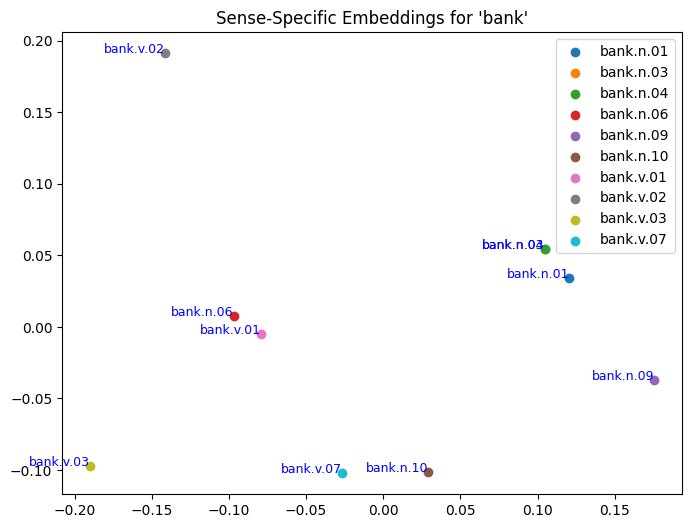

In [47]:


def get_sense_definitions_and_examples(word):
    """
    Get WordNet sense definitions and examples for a given word.
    """
    senses = {}
    for synset in wn.synsets(word):
        if synset.name().startswith(word):
            senses[synset.name()] = {
                "definition": synset.definition(),
                "examples": synset.examples(),
            }
    return senses


def generate_sense_embeddings(word, senses, word_vectors):
    """
    Generate embeddings for each sense based on example sentences.
    """
    sense_embeddings = {}

    for sense, data in senses.items():
        examples = data["examples"]
        example_vectors = []

        for example in examples:
            # Tokenize the sentence and get embeddings for valid tokens
            tokens = example.split()
            valid_tokens = [t for t in tokens if t in word_vectors]
            if valid_tokens:
                vectors = np.array([word_vectors[t] for t in valid_tokens])
                example_vectors.append(np.mean(vectors, axis=0))  # Average the vectors

        if example_vectors:
            sense_embeddings[sense] = np.mean(example_vectors, axis=0)
        else:
            print(f"No valid embeddings found for sense: {sense}")

    return sense_embeddings


def compute_cosine_similarity(vec1, vec2):
    """
    Compute cosine similarity between two vectors.
    """
    vec1 = vec1.reshape(1, -1)
    vec2 = vec2.reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]


def visualize_embeddings(word, sense_embeddings):
    """
    Visualize sense-specific embeddings using PCA.
    """
    if not sense_embeddings:
        print(f"No embeddings found for the word '{word}'")
        return

    vectors = list(sense_embeddings.values())
    labels = list(sense_embeddings.keys())

    # Apply PCA to reduce dimensions
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    # Plot the reduced vectors
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=label)
        plt.text(
            reduced_vectors[i, 0],
            reduced_vectors[i, 1],
            label,
            fontsize=9,
            ha="right",
            color="blue",
        )
    plt.title(f"Sense-Specific Embeddings for '{word}'")
    plt.legend()
    plt.show()


def main():
    # Word for which we differentiate senses
    word = "bank"

    # Load pre-trained embeddings
    

    # Step 1: Get senses from WordNet
    senses = get_sense_definitions_and_examples(word)
    print(f"Senses for '{word}':")
    for sense, details in senses.items():
        print(f" - {sense}: {details['definition']}")

    # Step 2: Generate sense embeddings
    sense_embeddings = generate_sense_embeddings(word, senses, word_vectors)

    # Step 3: Compute cosine similarity
    sense1 = "bank.n.01"  # Example sense: river bank
    sense2 = "bank.v.03"  # Example sense: financial institution

    if sense1 in sense_embeddings and sense2 in sense_embeddings:
        vec1 = sense_embeddings[sense1]
        vec2 = sense_embeddings[sense2]
        similarity = compute_cosine_similarity(vec1, vec2)
        print(f"Cosine similarity between '{sense1}' and '{sense2}': {similarity:.4f}")
    else:
        print(f"Embeddings for one or both senses '{sense1}' and '{sense2}' are missing.")

    # Step 4: Visualize the sense embeddings
    visualize_embeddings(word, sense_embeddings)


if __name__ == "__main__":
    main()


In [45]:
from scipy.spatial.distance import euclidean

def get_sense_definitions_and_examples(word):
    """
    Get WordNet sense definitions and examples for a given word.
    """
    senses = {}
    for synset in wn.synsets(word):
        if synset.name().startswith(word):
            senses[synset.name()] = {
                "definition": synset.definition(),
                "examples": synset.examples(),
            }
    return senses

def compute_sense_embeddings(word, sense_examples, word_vectors):
    """
    Compute sense-specific embeddings for a word using example sentences.
    Use the dot product projection onto the subspace created by the examples.
    """
    sense_embeddings = {}
    if word not in word_vectors:
        print(f"Word '{word}' not found in embeddings.")
        return sense_embeddings

    word_vector = word_vectors[word]

    for sense, examples in sense_examples.items():
        # Tokenize examples and find words with valid embeddings
        tokens = []
        for example in examples:
            tokens.extend([t for t in example.split() if t in word_vectors])

        if tokens:
            # Compute the subspace (mean of all example vectors)
            subspace = np.mean([word_vectors[t] for t in tokens], axis=0)
            # Project word embedding onto the subspace
            projection = np.dot(word_vector, subspace) / np.linalg.norm(subspace)
            sense_embeddings[sense] = projection
        else:
            print(f"No valid embeddings found for sense: {sense}")
    return sense_embeddings

def compute_similarity(vec1, vec2):
    """
    Compute cosine similarity and Euclidean distance between two vectors.
    """
    similarity = cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0][0]
    distance = euclidean(vec1, vec2)
    return similarity, distance

def visualize_embeddings(sense_embeddings):
    """
    Visualize sense-specific embeddings in 2D space using PCA.
    """
    if len(sense_embeddings) < 2:
        print("Not enough embeddings for visualization.")
        return

    vectors = list(sense_embeddings.values())
    labels = list(sense_embeddings.keys())

    # Dimensionality reduction
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(np.array(vectors).reshape(-1, 1))

    # Plot the results
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=label)
        plt.text(
            reduced_vectors[i, 0],
            reduced_vectors[i, 1],
            label,
            fontsize=9,
            ha="right",
            color="blue",
        )
    plt.title("PCA of Sense-Specific Embeddings")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()

def get_nearest_neighbors(embedding, word_vectors, top_n=5):
    """
    Find the nearest neighbors for a given embedding.
    """
    neighbors = word_vectors.similar_by_vector(embedding, topn=top_n)
    return neighbors

def main():
    # Word to analyze
    word = "bank"

    # Load pre-trained embeddings
    
    # Get WordNet senses
    senses = get_sense_definitions_and_examples(word)
    print(f"Senses for '{word}':")
    for sense, details in senses.items():
        print(f" - {sense}: {details['definition']}")

    # Extract examples for each sense
    sense_examples = {sense: details["examples"] for sense, details in senses.items()}

    # Compute sense-specific embeddings using projections
    sense_embeddings = compute_sense_embeddings(word, sense_examples, word_vectors)

    # Print projections (i.e., sense-specific embeddings)
    print("\nProjections onto sense subspaces:")
    for sense, value in sense_embeddings.items():
        print(f" - {sense}: {value:.4f}")

    # Compare similarities between senses
    senses_list = list(sense_embeddings.keys())
    if len(senses_list) >= 2:
        vec1, vec2 = sense_embeddings[senses_list[0]], sense_embeddings[senses_list[1]]
        similarity, distance = compute_similarity(vec1, vec2)
        print(f"\nCosine similarity between '{senses_list[0]}' and '{senses_list[1]}': {similarity:.4f}")
        print(f"Euclidean distance between '{senses_list[0]}' and '{senses_list[1]}': {distance:.4f}")

    # Visualize embeddings using PCA
    visualize_embeddings(sense_embeddings)

    # Example of nearest neighbors (if required)
    if len(senses_list) >= 1:
        print("\nNearest neighbors for sense 1:")
        neighbors = get_nearest_neighbors(sense_embeddings[senses_list[0]], word_vectors)
        for neighbor in neighbors:
            print(neighbor)

if __name__ == "__main__":
    main()


Senses for 'bank':
 - bank.n.01: sloping land (especially the slope beside a body of water)
 - bank.n.03: a long ridge or pile
 - bank.n.04: an arrangement of similar objects in a row or in tiers
 - bank.n.05: a supply or stock held in reserve for future use (especially in emergencies)
 - bank.n.06: the funds held by a gambling house or the dealer in some gambling games
 - bank.n.07: a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
 - bank.n.09: a building in which the business of banking transacted
 - bank.n.10: a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
 - bank.v.01: tip laterally
 - bank.v.02: enclose with a bank
 - bank.v.03: do business with a bank or keep an account at a bank
 - bank.v.04: act as the banker in a game or in gambling
 - bank.v.05: be in the banking business
 - bank.v.07: cover with ashes so to control the rate of burning
No valid embe

ValueError: Input vector should be 1-D.